<a href="https://colab.research.google.com/github/Veritate1311/Portfolio/blob/Datascience_algo/fer_dataset_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Import Librares

In [2]:
import warnings

#ignore Warnings

warnings.filterwarnings('always')
warnings.filterwarnings('ignore')


#Manipulasi data
import numpy as np
import pandas as pd

#Visualisasi Data
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

#Model Selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import LabelEncoder

#preprocess
from keras.preprocessing.image import ImageDataGenerator

#dl libraries
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD, Adagrad, Adadelta, RMSprop
from keras.utils import to_categorical


#specially for CNN
from keras.layers import Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPool2D, MaxPooling2D, BatchNormalization
from keras.layers import Activation, Dense,GlobalAveragePooling2D, Dropout
from keras.models import Model
from keras.optimizers import SGD
from keras.metrics import categorical_accuracy, top_k_categorical_accuracy

import tensorflow as tf
import random as rn

#soepecially for manipulating Zipped image and getting numpy arrays
import cv2
import os
from PIL import Image



In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
data = pd.read_csv('/content/sample_data/fer2013.csv')
data.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [12]:
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings("ignore")

# Load your data
data = pd.read_csv('/content/sample_data/fer2013.csv')

width, height = 48, 48

# Check the length of each data point
datapoints = data['pixels'].tolist()
correct_length = width * height

# Filter out data points that do not have the correct length
filtered_data = []
for xseq in datapoints:
    if xseq.strip():  # Check if the string is not empty
        xx = [int(xp) for xp in xseq.split(' ') if xp.isdigit()]  # Ensure each part is a digit
        if len(xx) == correct_length:
            filtered_data.append(xx)

# Convert the filtered data into the desired format
X = []
for xx in filtered_data:
    xx = np.asarray(xx).reshape(width, height)
    X.append(xx.astype('float32'))

X = np.asarray(X)
X = np.expand_dims(X, -1)

# Update the data DataFrame to only include rows with the correct length
valid_indices = [i for i, xseq in enumerate(datapoints) if len(xseq.split(' ')) == correct_length]
data = data.iloc[valid_indices]

# Adjust the labels
data['emotion'] = data['emotion'].replace({0: 0, 1: 0, 2: 0, 3: 1, 4: 0, 5: 1, 6: 1})

# Get the labels for training
y = data['emotion']

print("Preprocessing Done")
print("Number of Features: " + str(X.shape[1] * X.shape[2]))
print("Number of Labels: " + str(len(y)))
print("Number of examples in dataset: " + str(len(X)))
print("X, y stored in fdataX.npy and flabels.npy respectively")


Preprocessing Done
Number of Features: 2304
Number of Labels: 373
Number of examples in dataset: 373
X, y stored in fdataX.npy and flabels.npy respectively


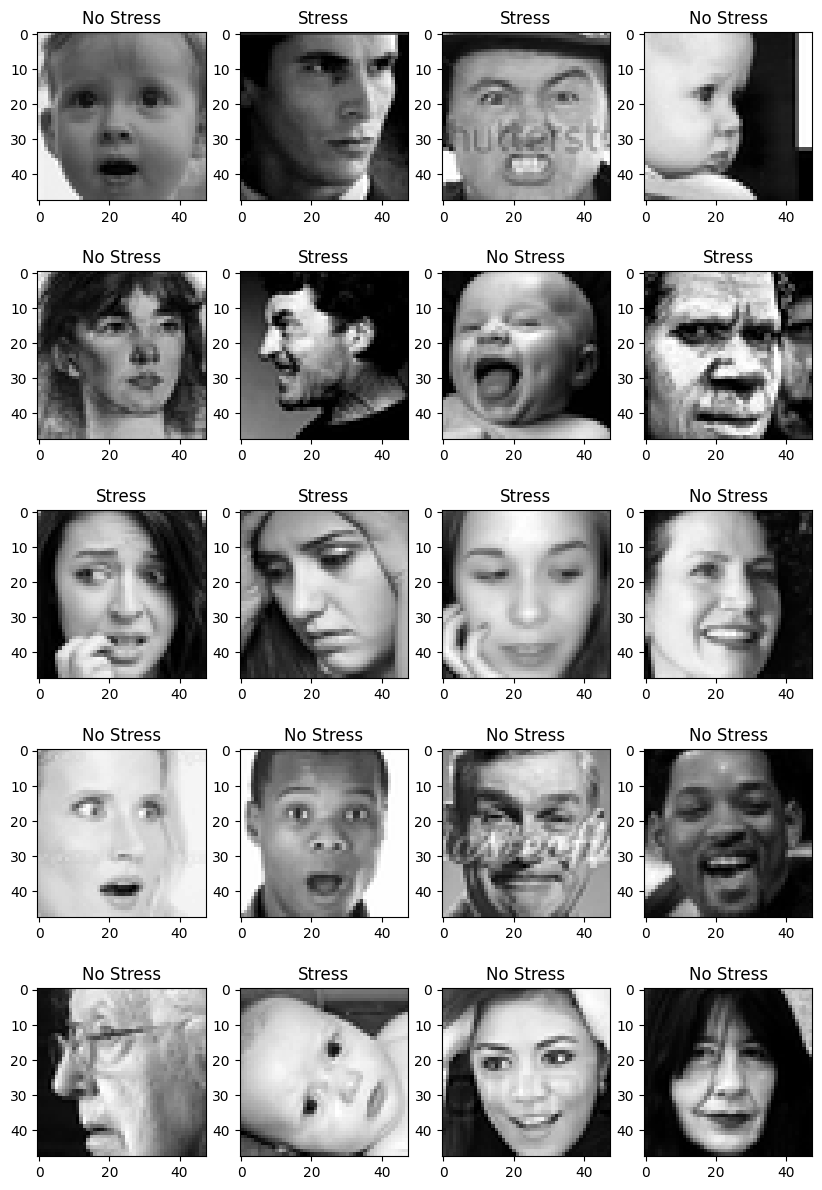

In [13]:
labels = ['Stress', 'No Stress']

w=10
h=10
fig=plt.figure(figsize=(10, 15))
columns = 4
rows = 5
for i in range(1, columns*rows +1):
#     img = np.random.randint(10, size=(h,w))
    fig.add_subplot(rows, columns, i)
    angka_random = rn.randint(1,len(X))
    plt.imshow(X[angka_random].reshape(48,48), cmap = 'gray')
    plt.title(labels[y[angka_random]])
plt.show()

In [14]:
# storing them using numpy
np.save('fdataX', X)
np.save('flabels', y)

Y = to_categorical(y,len(labels))
X = np.array(X)
X = X/255 #proses normalisasi

In [15]:
X_new = []
for i in range(len(X)):
    stacked_img = np.stack((X[i].reshape(48,48),)*3, axis=-1)
    X_new.append(stacked_img)

X_new = np.array(X_new)

In [16]:
x_train, x_test, y_train, y_test = train_test_split(X_new, Y, test_size = 0.2)
print("Data Train Shape")
print("X_TRAIN : ", x_train.shape)
print("Y_TRAIN : ", y_train.shape)

print("Data Test Shape")
print("X_TRAIN : ", x_test.shape)
print("Y_TRAIN : ", y_test.shape)

Data Train Shape
X_TRAIN :  (298, 48, 48, 3)
Y_TRAIN :  (298, 2)
Data Test Shape
X_TRAIN :  (75, 48, 48, 3)
Y_TRAIN :  (75, 2)


In [17]:
def f1_score(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [18]:
def confusion_matrix_img(y_pred, y_true, savename):
    cm = confusion_matrix(y_true, y_pred)
    labels = ['Stress','No Stress']
    title='Confusion matrix'
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.savefig(savename)
    plt.show()

In [19]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [20]:
batch_size= 64
epochs = 50

from keras.callbacks import EarlyStopping, ReduceLROnPlateau
# red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)


earlystop = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=epochs,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=5,
                              verbose=1,
                              min_delta=0.0001)

callbacks = [earlystop, reduce_lr]

# Model Train

# Mobile-NetV1

In [21]:
from keras.applications import MobileNet


base_model = MobileNet(weights='imagenet', include_top=False )

# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)
# and a logistic layer -- let's say we have 200 classes
predictions = Dense(2, activation='softmax')(x)

# this is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

model.summary()

17225924/17225924 [==============================] - 1s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 conv1 (Conv2D)              (None, None, None, 32)    864       
                                                                 
 conv1_bn (BatchNormalizati  (None, None, None, 32)    128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, None, None, 32)    0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, None, None, 32)    288       
 )                                                               
                                                              

In [22]:
%%time
# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07),
    loss = tf.keras.losses.CategoricalCrossentropy(reduction=tf.keras.losses.Reduction.AUTO),
    metrics=['accuracy' , tf.keras.metrics.Precision(name='precision'),
             tf.keras.metrics.Recall(name='recall'),tf.keras.metrics.AUC(name='AUC'),f1_score]
)

History = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = 10,
                              callbacks = callbacks,
                              validation_data = (x_test,y_test),
                              verbose = 1)

Epoch 1/10
5/5 [==============================] - 23s 605ms/step - loss: 1.3790 - accuracy: 0.5570 - precision: 0.5570 - recall: 0.5570 - AUC: 0.5559 - f1_score: 0.5597 - val_loss: 0.7260 - val_accuracy: 0.4400 - val_precision: 0.4400 - val_recall: 0.4400 - val_AUC: 0.4719 - val_f1_score: 0.4631 - lr: 0.0010
Epoch 2/10
5/5 [==============================] - 0s 97ms/step - loss: 1.2670 - accuracy: 0.5973 - precision: 0.5973 - recall: 0.5973 - AUC: 0.6256 - f1_score: 0.5939 - val_loss: 0.7096 - val_accuracy: 0.5200 - val_precision: 0.5200 - val_recall: 0.5200 - val_AUC: 0.5315 - val_f1_score: 0.4858 - lr: 0.0010
Epoch 3/10
5/5 [==============================] - 0s 67ms/step - loss: 1.1468 - accuracy: 0.6242 - precision: 0.6242 - recall: 0.6242 - AUC: 0.6782 - f1_score: 0.6287 - val_loss: 0.9228 - val_accuracy: 0.4267 - val_precision: 0.4267 - val_recall: 0.4267 - val_AUC: 0.4681 - val_f1_score: 0.4527 - lr: 0.0010
Epoch 4/10
5/5 [==============================] - 0s 82ms/step - loss: 1.0

In [23]:
model.save('my_model.hdf5')

In [24]:
# saving the model
import pickle
pickle_out = open("classifier.pkl", mode = "wb")
pickle.dump(model, pickle_out)
pickle_out.close()

In [25]:
model.save_weights("model_weight.h5")
print("Saved model to disk")

Saved model to disk


In [26]:
df = pd.DataFrame(History.history)
df.to_excel("output.xlsx")
#df.to_csv("output.csv")
df.head()

,loss,accuracy,precision,recall,AUC,f1_score,val_loss,val_accuracy,val_precision,val_recall,val_AUC,val_f1_score,lr
0,1.379021,0.557047,0.557047,0.557047,0.555887,0.559673,0.726032,0.440000,0.440000,0.440000,0.471911,0.463068,0.001
1,1.266999,0.597315,0.597315,0.597315,0.625631,0.593899,0.709567,0.520000,0.520000,0.520000,0.531467,0.485795,0.001
2,1.146773,0.624161,0.624161,0.624161,0.678168,0.628720,0.922773,0.426667,0.426667,0.426667,0.468089,0.452651,0.001
3,1.003613,0.647651,0.647651,0.647651,0.695171,0.652232,1.165896,0.560000,0.560000,0.560000,0.593244,0.536932,0.001
4,0.994058,0.657718,0.657718,0.657718,0.683674,0.663244,0.941130,0.573333,0.573333,0.573333,0.589511,0.587121,0.001


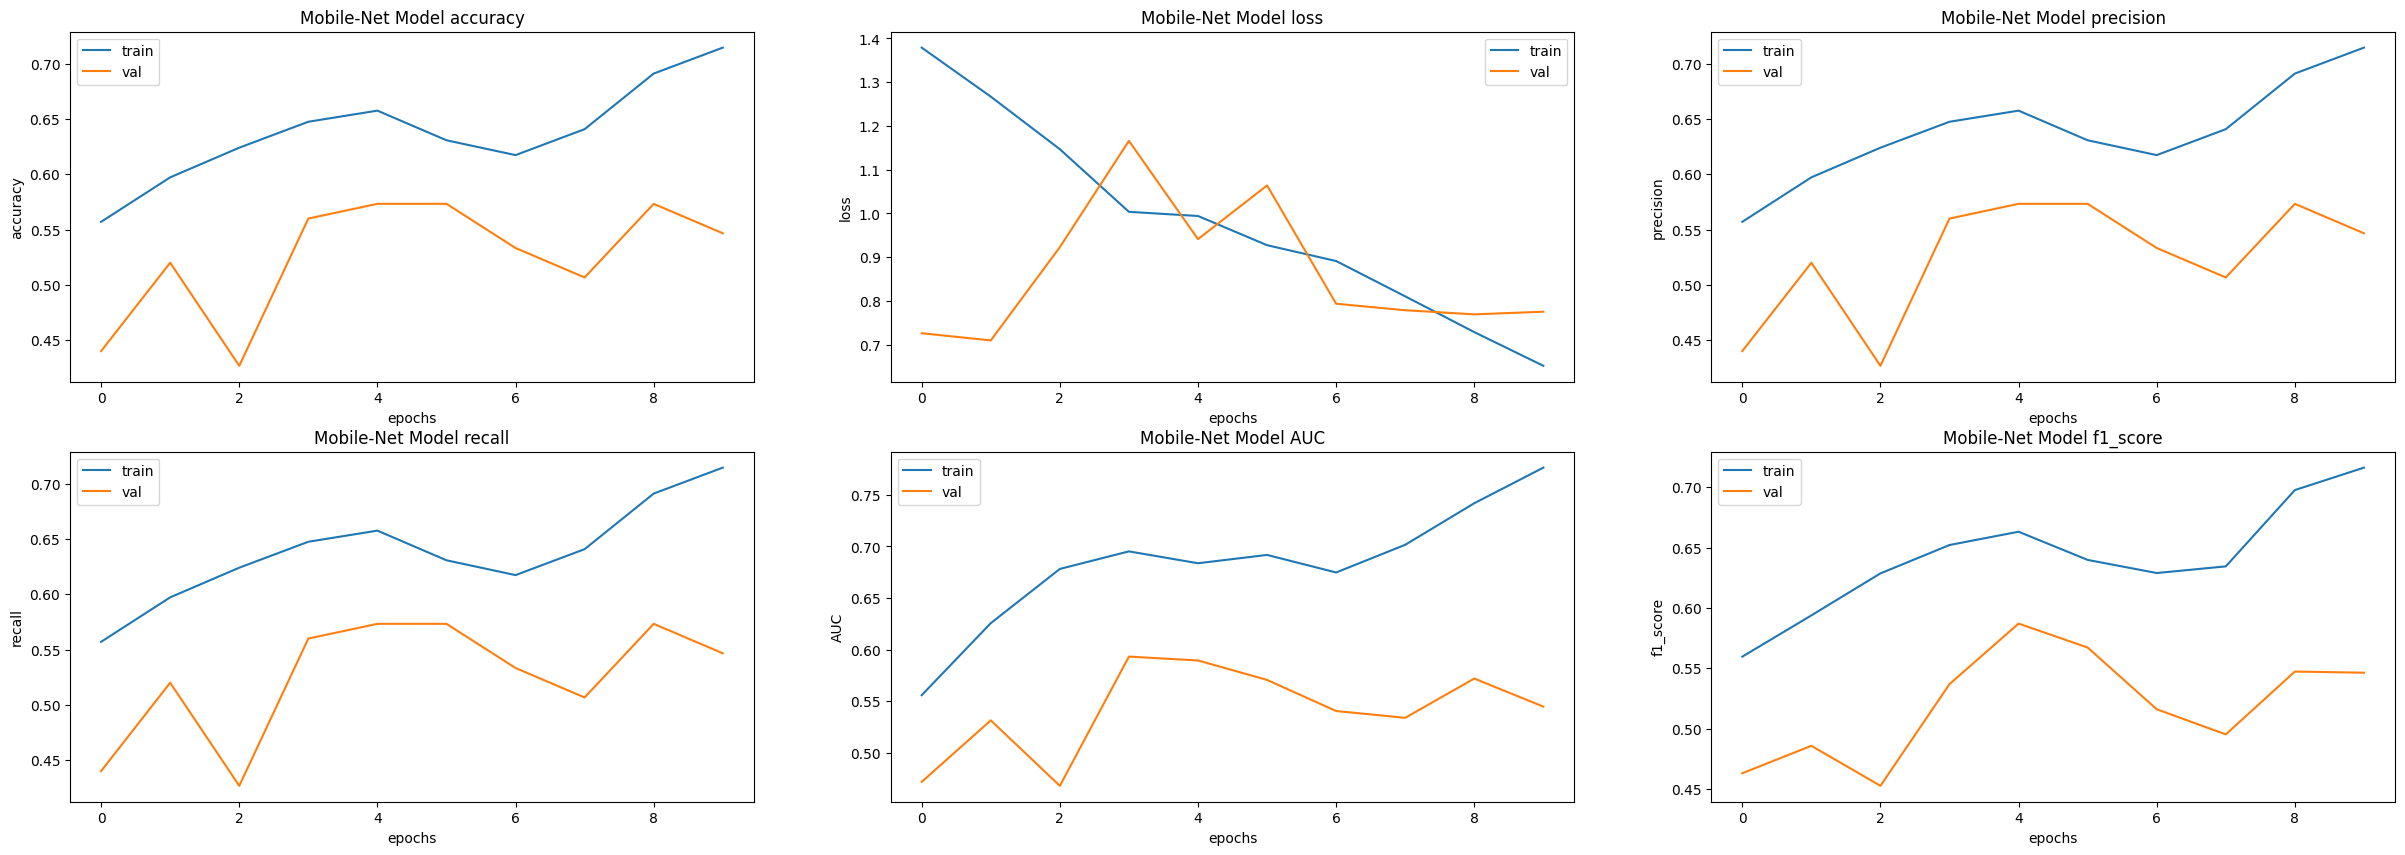

In [27]:
# Interpreting the Metrics
fig, ax = plt.subplots(2, 3, figsize=(30, 10))
ax = ax.ravel()

#for i, met in enumerate(['precision', 'recall', 'accuracy', 'loss']):
for i, met in enumerate(['accuracy', 'loss', 'precision', 'recall', 'AUC', 'f1_score' ]):
    ax[i].plot(History.history[met])
    ax[i].plot(History.history['val_' + met])
    ax[i].set_title('Mobile-Net Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])
plt.savefig("Model-plot.png")

In [28]:
truey=[]
predy=[]
x = x_test
y = y_test

yhat= model.predict(x)
yh = yhat.tolist()
yt = y.tolist()
count = 0

for i in range(len(y)):
    yy = max(yh[i])
    yyt = max(yt[i])
    predy.append(yh[i].index(yy))
    truey.append(yt[i].index(yyt))
    if(yh[i].index(yy)== yt[i].index(yyt)):
        count+=1

acc = (count/len(y))*100

#saving values for confusion matrix and analysis
np.save('truey', truey)
np.save('predy', predy)
print("Predicted and true label values saved")
print("Accuracy on test set :"+str(acc)+"%")

3/3 [==============================] - 1s 8ms/step
Predicted and true label values saved
Accuracy on test set :54.666666666666664%


# New Section

[[19 12]
 [22 22]]


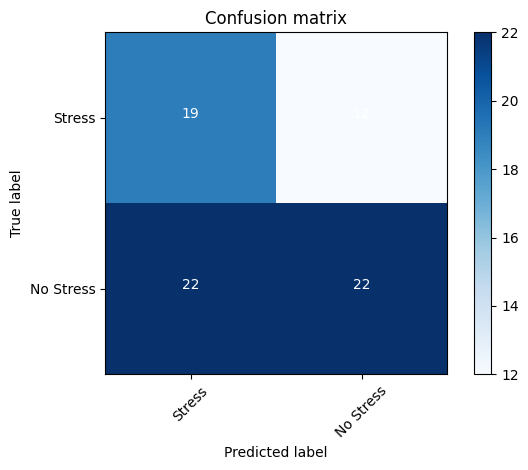

In [29]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


confusion_matrix_img(truey, predy, savename='Confusion Matrix')

# Mobile-NetV2

In [30]:
from keras.applications import MobileNetV2


base_model = MobileNetV2(weights='imagenet', include_top=False )

# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(512, activation='relu')(x)

x = Dropout(0.3)(x)
# and a logistic layer -- let's say we have 200 classes
predictions = Dense(2, activation='softmax')(x)

# this is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

model.summary()

9406464/9406464 [==============================] - 1s 0us/step
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, None, None, 32)       864       ['input_2[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, None, None, 32)       128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           

In [31]:
%%time
# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07),
    loss = tf.keras.losses.CategoricalCrossentropy(reduction=tf.keras.losses.Reduction.AUTO),
    metrics=['accuracy' , tf.keras.metrics.Precision(name='precision'),
             tf.keras.metrics.Recall(name='recall'),tf.keras.metrics.AUC(name='AUC'),f1_score]
)

History = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs,
                              callbacks = callbacks,
                              validation_data = (x_test,y_test),
                              verbose = 1)

Epoch 1/50
5/5 [==============================] - 41s 1s/step - loss: 1.2572 - accuracy: 0.5134 - precision: 0.5134 - recall: 0.5134 - AUC: 0.5474 - f1_score: 0.5125 - val_loss: 0.6955 - val_accuracy: 0.6000 - val_precision: 0.6000 - val_recall: 0.6000 - val_AUC: 0.5668 - val_f1_score: 0.6080 - lr: 0.0010
Epoch 2/50
5/5 [==============================] - 0s 97ms/step - loss: 1.0918 - accuracy: 0.5235 - precision: 0.5235 - recall: 0.5235 - AUC: 0.5486 - f1_score: 0.5301 - val_loss: 0.6908 - val_accuracy: 0.5733 - val_precision: 0.5733 - val_recall: 0.5733 - val_AUC: 0.5280 - val_f1_score: 0.5672 - lr: 0.0010
Epoch 3/50
5/5 [==============================] - 0s 87ms/step - loss: 0.9690 - accuracy: 0.5705 - precision: 0.5705 - recall: 0.5705 - AUC: 0.5751 - f1_score: 0.5722 - val_loss: 0.8441 - val_accuracy: 0.5200 - val_precision: 0.5200 - val_recall: 0.5200 - val_AUC: 0.4651 - val_f1_score: 0.5057 - lr: 0.0010
Epoch 4/50
5/5 [==============================] - 0s 85ms/step - loss: 0.8120

In [32]:
model.save_weights("model_weight0.h5")
print("Saved model to disk")

Saved model to disk


In [33]:
df = pd.DataFrame(History.history)
df.to_excel("output0.xlsx")
#df.to_csv("output.csv")
df.head()

,loss,accuracy,precision,recall,AUC,f1_score,val_loss,val_accuracy,val_precision,val_recall,val_AUC,val_f1_score,lr
0,1.257247,0.513423,0.513423,0.513423,0.547442,0.512500,0.695534,0.600000,0.600000,0.600000,0.566756,0.607955,0.001
1,1.091830,0.523490,0.523490,0.523490,0.548590,0.530059,0.690825,0.573333,0.573333,0.573333,0.528000,0.567235,0.001
2,0.968997,0.570470,0.570470,0.570470,0.575149,0.572173,0.844121,0.520000,0.520000,0.520000,0.465067,0.505682,0.001
3,0.811970,0.543624,0.543624,0.543624,0.568629,0.540625,0.691023,0.560000,0.560000,0.560000,0.563911,0.576705,0.001
4,0.906956,0.583893,0.583893,0.583893,0.595593,0.587946,0.842222,0.626667,0.626667,0.626667,0.645156,0.589015,0.001


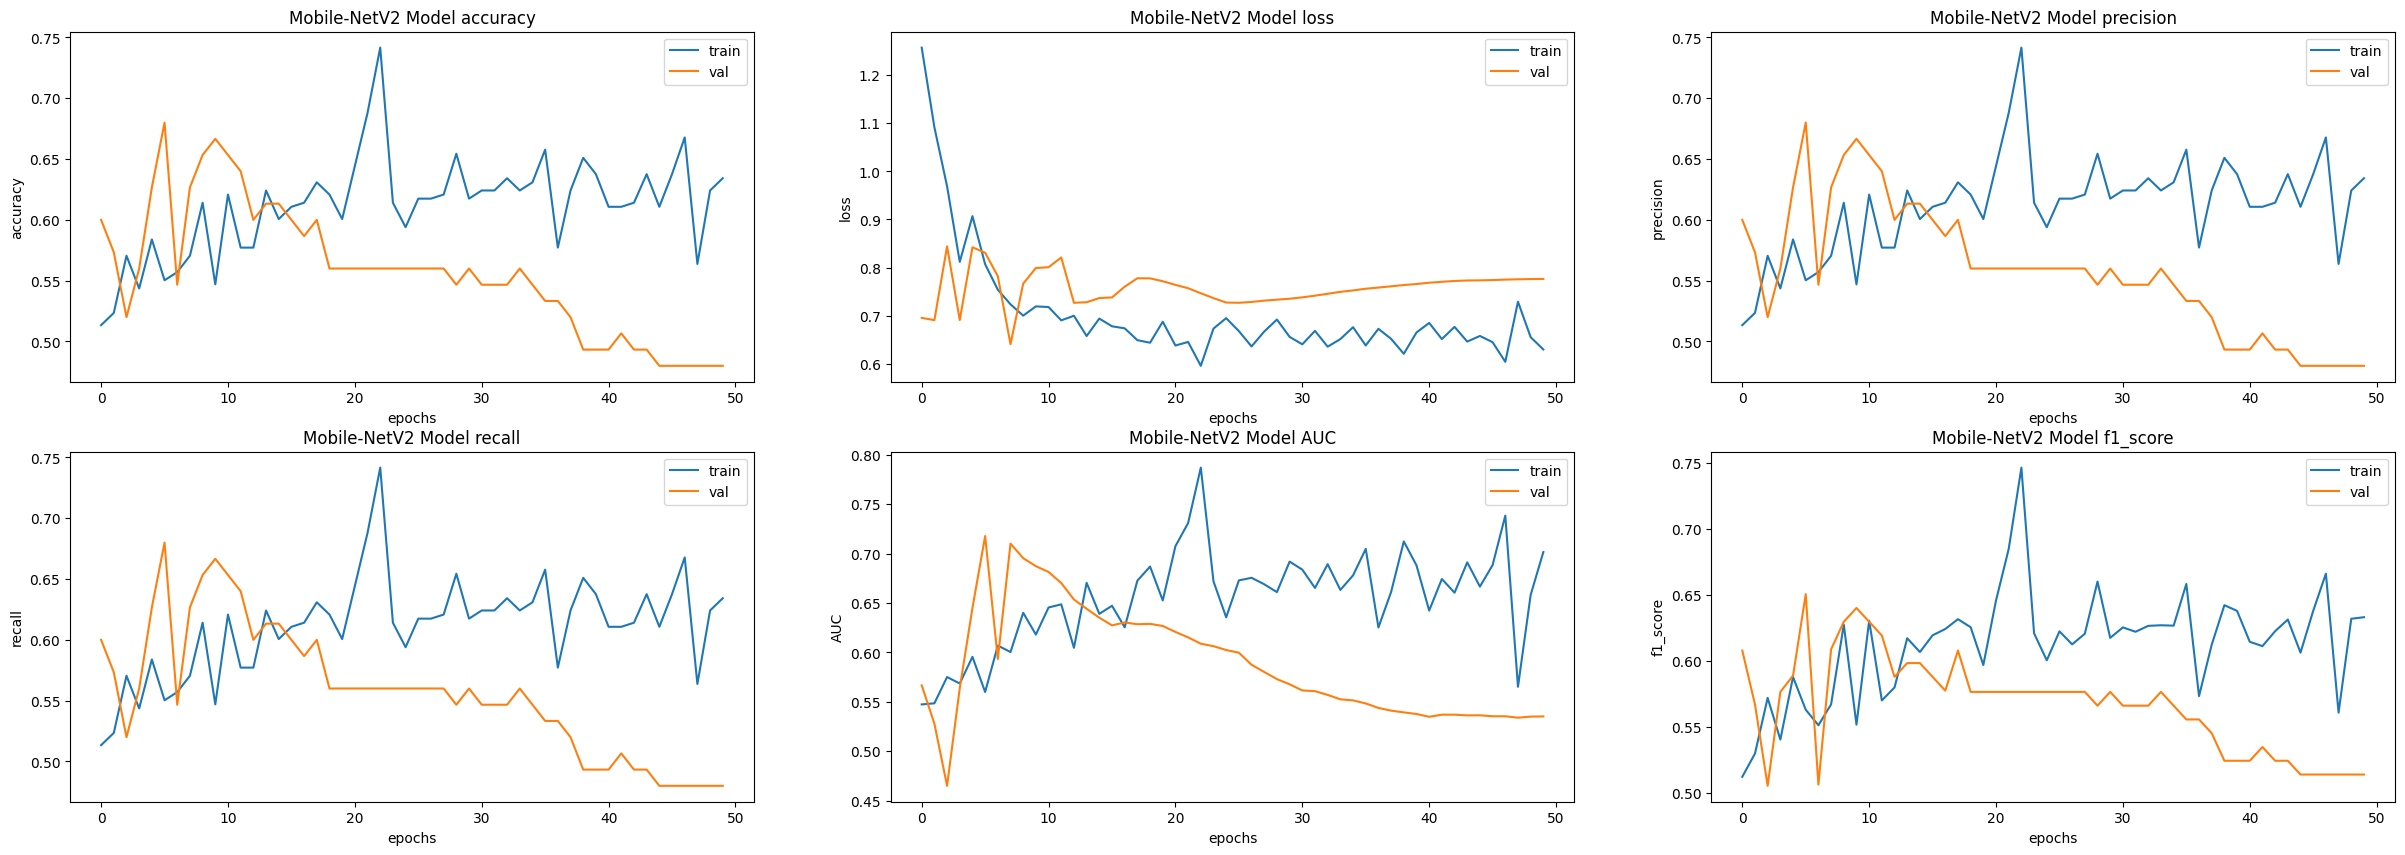

In [34]:
# Interpreting the Metrics
fig, ax = plt.subplots(2, 3, figsize=(30, 10))
ax = ax.ravel()

#for i, met in enumerate(['precision', 'recall', 'accuracy', 'loss']):
for i, met in enumerate(['accuracy', 'loss', 'precision', 'recall', 'AUC', 'f1_score' ]):
    ax[i].plot(History.history[met])
    ax[i].plot(History.history['val_' + met])
    ax[i].set_title('Mobile-NetV2 Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])
plt.savefig("Model-plot0.png")

In [35]:
truey=[]
predy=[]
x = x_test
y = y_test

yhat= model.predict(x)
yh = yhat.tolist()
yt = y.tolist()
count = 0

for i in range(len(y)):
    yy = max(yh[i])
    yyt = max(yt[i])
    predy.append(yh[i].index(yy))
    truey.append(yt[i].index(yyt))
    if(yh[i].index(yy)== yt[i].index(yyt)):
        count+=1

acc = (count/len(y))*100

#saving values for confusion matrix and analysis
np.save('truey', truey)
np.save('predy', predy)
print("Predicted and true label values saved")
print("Accuracy on test set :"+str(acc)+"%")

3/3 [==============================] - 1s 8ms/step
Predicted and true label values saved
Accuracy on test set :48.0%


[[ 2  0]
 [39 34]]


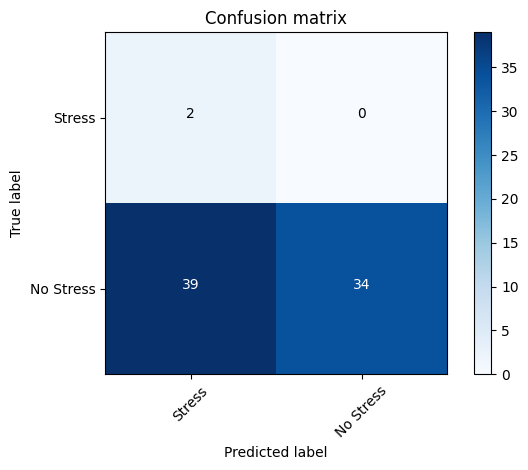

In [36]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


confusion_matrix_img(truey, predy, savename='Confusion Matrix0')

# MobileNetV3-Large

In [37]:
from tensorflow.keras.applications import MobileNetV3Large


base_model = MobileNetV3Large(weights='imagenet', include_top=False )

# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(512, activation='relu')(x)

x = Dropout(0.3)(x)
# and a logistic layer -- let's say we have 200 classes
predictions = Dense(2, activation='softmax')(x)

# this is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

model.summary()

12683000/12683000 [==============================] - 1s 0us/step
Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, None, None, 3)        0         ['input_3[0][0]']             
                                                                                                  
 Conv (Conv2D)               (None, None, None, 16)       432       ['rescaling[0][0]']           
                                                                                                  
 Conv/BatchNorm (BatchNorma  (None, None, None, 16)       64        ['Conv[0][0]']                
 lization)                 

In [38]:
%%time
# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07),
    loss = tf.keras.losses.CategoricalCrossentropy(reduction=tf.keras.losses.Reduction.AUTO),
    metrics=['accuracy' , tf.keras.metrics.Precision(name='precision'),
             tf.keras.metrics.Recall(name='recall'),tf.keras.metrics.AUC(name='AUC'),f1_score]
)

History = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs,
                              callbacks = callbacks,
                              validation_data = (x_test,y_test),
                              verbose = 1)

Epoch 1/50
5/5 [==============================] - 38s 1s/step - loss: 1.2976 - accuracy: 0.5101 - precision: 0.5101 - recall: 0.5101 - AUC: 0.4894 - f1_score: 0.5045 - val_loss: 0.6867 - val_accuracy: 0.5333 - val_precision: 0.5333 - val_recall: 0.5333 - val_AUC: 0.5911 - val_f1_score: 0.4962 - lr: 0.0010
Epoch 2/50
5/5 [==============================] - 0s 93ms/step - loss: 1.3223 - accuracy: 0.5067 - precision: 0.5067 - recall: 0.5067 - AUC: 0.4872 - f1_score: 0.5210 - val_loss: 0.7023 - val_accuracy: 0.5467 - val_precision: 0.5467 - val_recall: 0.5467 - val_AUC: 0.5611 - val_f1_score: 0.5066 - lr: 0.0010
Epoch 3/50
5/5 [==============================] - 0s 93ms/step - loss: 0.9969 - accuracy: 0.5738 - precision: 0.5738 - recall: 0.5738 - AUC: 0.5928 - f1_score: 0.5687 - val_loss: 0.7505 - val_accuracy: 0.5467 - val_precision: 0.5467 - val_recall: 0.5467 - val_AUC: 0.5438 - val_f1_score: 0.5066 - lr: 0.0010
Epoch 4/50
5/5 [==============================] - 0s 88ms/step - loss: 0.9912

In [39]:
model.save_weights("model_weight1.h5")
print("Saved model to disk")

Saved model to disk


In [40]:
df = pd.DataFrame(History.history)
df.to_excel("output1.xlsx")
#df.to_csv("output.csv")
df.head()

,loss,accuracy,precision,recall,AUC,f1_score,val_loss,val_accuracy,val_precision,val_recall,val_AUC,val_f1_score,lr
0,1.297581,0.510067,0.510067,0.510067,0.489432,0.504464,0.686728,0.533333,0.533333,0.533333,0.591111,0.496212,0.001
1,1.322257,0.506711,0.506711,0.506711,0.487180,0.520982,0.702298,0.546667,0.546667,0.546667,0.561067,0.506629,0.001
2,0.996900,0.573825,0.573825,0.573825,0.592755,0.568750,0.750540,0.546667,0.546667,0.546667,0.543822,0.506629,0.001
3,0.991213,0.550336,0.550336,0.550336,0.569918,0.555059,0.718069,0.546667,0.546667,0.546667,0.514667,0.506629,0.001
4,0.985513,0.520134,0.520134,0.520134,0.539159,0.525298,0.696337,0.573333,0.573333,0.573333,0.545689,0.527462,0.001


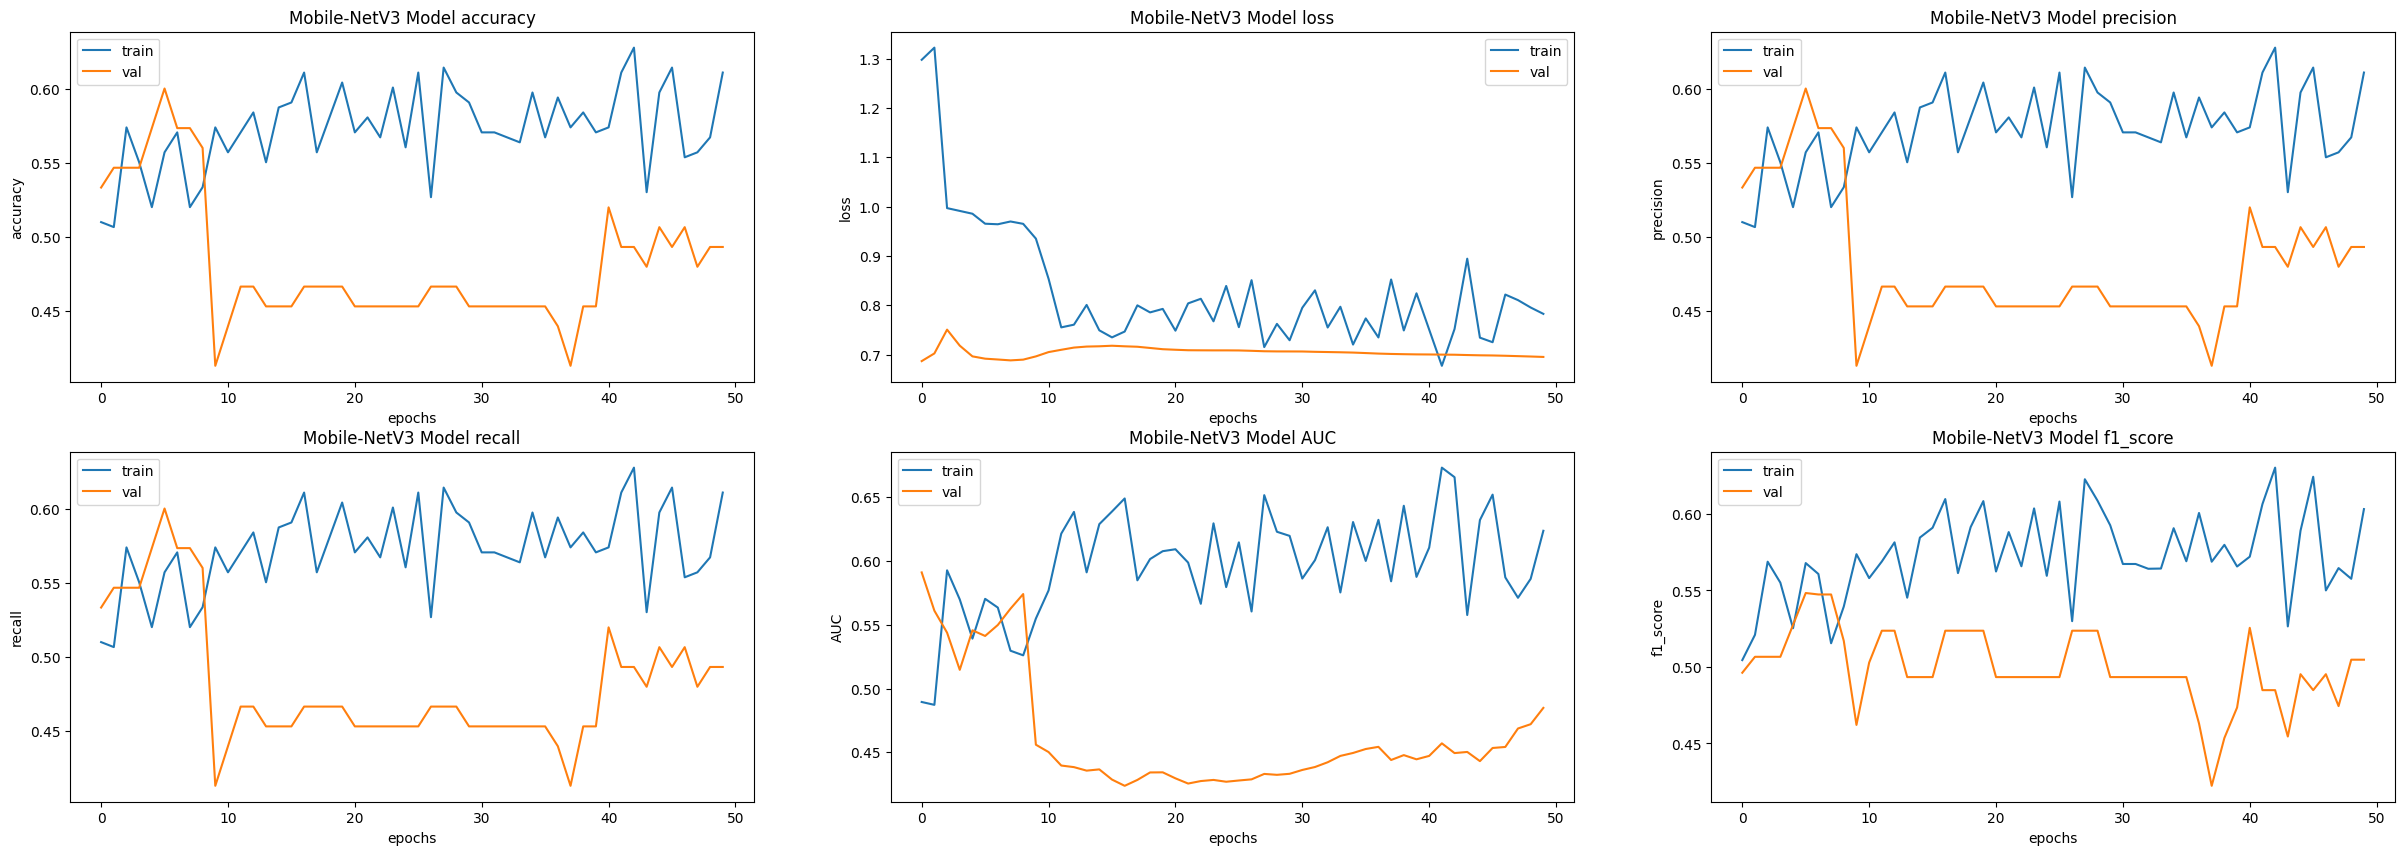

In [41]:
# Interpreting the Metrics
fig, ax = plt.subplots(2, 3, figsize=(30, 10))
ax = ax.ravel()

#for i, met in enumerate(['precision', 'recall', 'accuracy', 'loss']):
for i, met in enumerate(['accuracy', 'loss', 'precision', 'recall', 'AUC', 'f1_score' ]):
    ax[i].plot(History.history[met])
    ax[i].plot(History.history['val_' + met])
    ax[i].set_title('Mobile-NetV3 Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])
plt.savefig("Model-plot1.png")

In [42]:
  truey=[]
  predy=[]
  x = x_test
  y = y_test

  yhat= model.predict(x)
  yh = yhat.tolist()
  yt = y.tolist()
  count = 0

  for i in range(len(y)):
      yy = max(yh[i])
      yyt = max(yt[i])
      predy.append(yh[i].index(yy))
      truey.append(yt[i].index(yyt))
      if(yh[i].index(yy)== yt[i].index(yyt)):
          count+=1

  acc = (count/len(y))*100

  #saving values for confusion matrix and analysis
  np.save('truey', truey)
  np.save('predy', predy)
  print("Predicted and true label values saved")
  print("Accuracy on test set :"+str(acc)+"%")

3/3 [==============================] - 1s 10ms/step
Predicted and true label values saved
Accuracy on test set :49.333333333333336%


[[15 12]
 [26 22]]


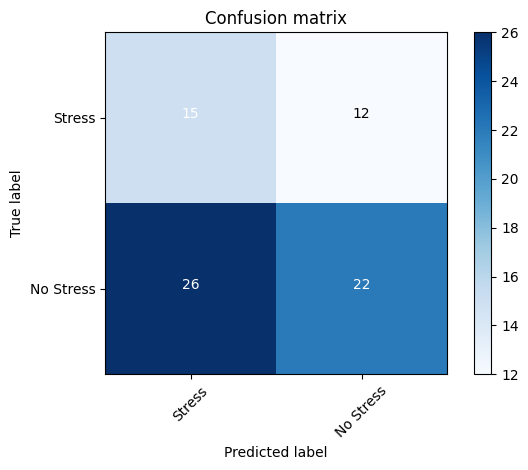

In [43]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


confusion_matrix_img(truey, predy, savename='Confusion Matrix1')

# MobileNetV3-Small

In [44]:
from tensorflow.keras.applications import MobileNetV3Small


base_model = MobileNetV3Small(weights='imagenet', include_top=False )

# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(512, activation='relu')(x)

x = Dropout(0.3)(x)
# and a logistic layer -- let's say we have 200 classes
predictions = Dense(2, activation='softmax')(x)

# this is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

model.summary()

4334752/4334752 [==============================] - 1s 0us/step
Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 rescaling_1 (Rescaling)     (None, None, None, 3)        0         ['input_4[0][0]']             
                                                                                                  
 Conv (Conv2D)               (None, None, None, 16)       432       ['rescaling_1[0][0]']         
                                                                                                  
 Conv/BatchNorm (BatchNorma  (None, None, None, 16)       64        ['Conv[0][0]']                
 lization)                   

In [45]:
%%time
# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07),
    loss = tf.keras.losses.CategoricalCrossentropy(reduction=tf.keras.losses.Reduction.AUTO),
    metrics=['accuracy' , tf.keras.metrics.Precision(name='precision'),
             tf.keras.metrics.Recall(name='recall'),tf.keras.metrics.AUC(name='AUC'),f1_score]
)

History = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs,
                              callbacks = callbacks,
                              validation_data = (x_test,y_test),
                              verbose = 1)

Epoch 1/50
5/5 [==============================] - 31s 1s/step - loss: 1.3830 - accuracy: 0.5168 - precision: 0.5168 - recall: 0.5168 - AUC: 0.5215 - f1_score: 0.5205 - val_loss: 0.7385 - val_accuracy: 0.4533 - val_precision: 0.4533 - val_recall: 0.4533 - val_AUC: 0.4695 - val_f1_score: 0.4934 - lr: 0.0010
Epoch 2/50
5/5 [==============================] - 1s 105ms/step - loss: 1.2878 - accuracy: 0.4799 - precision: 0.4799 - recall: 0.4799 - AUC: 0.4994 - f1_score: 0.4747 - val_loss: 0.8049 - val_accuracy: 0.4533 - val_precision: 0.4533 - val_recall: 0.4533 - val_AUC: 0.4816 - val_f1_score: 0.4934 - lr: 0.0010
Epoch 3/50
5/5 [==============================] - 1s 132ms/step - loss: 1.1120 - accuracy: 0.5302 - precision: 0.5302 - recall: 0.5302 - AUC: 0.5692 - f1_score: 0.5330 - val_loss: 0.8505 - val_accuracy: 0.4533 - val_precision: 0.4533 - val_recall: 0.4533 - val_AUC: 0.4517 - val_f1_score: 0.4934 - lr: 0.0010
Epoch 4/50
5/5 [==============================] - 1s 141ms/step - loss: 1.0

In [46]:
model.save_weights("model_weight2.h5")
print("Saved model to disk")

Saved model to disk


In [47]:
df = pd.DataFrame(History.history)
df.to_excel("output2.xlsx")
#df.to_csv("output.csv")
df.head()

,loss,accuracy,precision,recall,AUC,f1_score,val_loss,val_accuracy,val_precision,val_recall,val_AUC,val_f1_score,lr
0,1.383040,0.516779,0.516779,0.516779,0.521480,0.520536,0.738495,0.453333,0.453333,0.453333,0.469511,0.493371,0.001
1,1.287782,0.479866,0.479866,0.479866,0.499375,0.474702,0.804908,0.453333,0.453333,0.453333,0.481600,0.493371,0.001
2,1.112011,0.530201,0.530201,0.530201,0.569231,0.533036,0.850460,0.453333,0.453333,0.453333,0.451733,0.493371,0.001
3,1.067258,0.526846,0.526846,0.526846,0.560650,0.523363,0.777813,0.453333,0.453333,0.453333,0.478044,0.493371,0.001
4,1.225701,0.463087,0.463087,0.463087,0.457350,0.467262,0.769065,0.453333,0.453333,0.453333,0.455467,0.493371,0.001


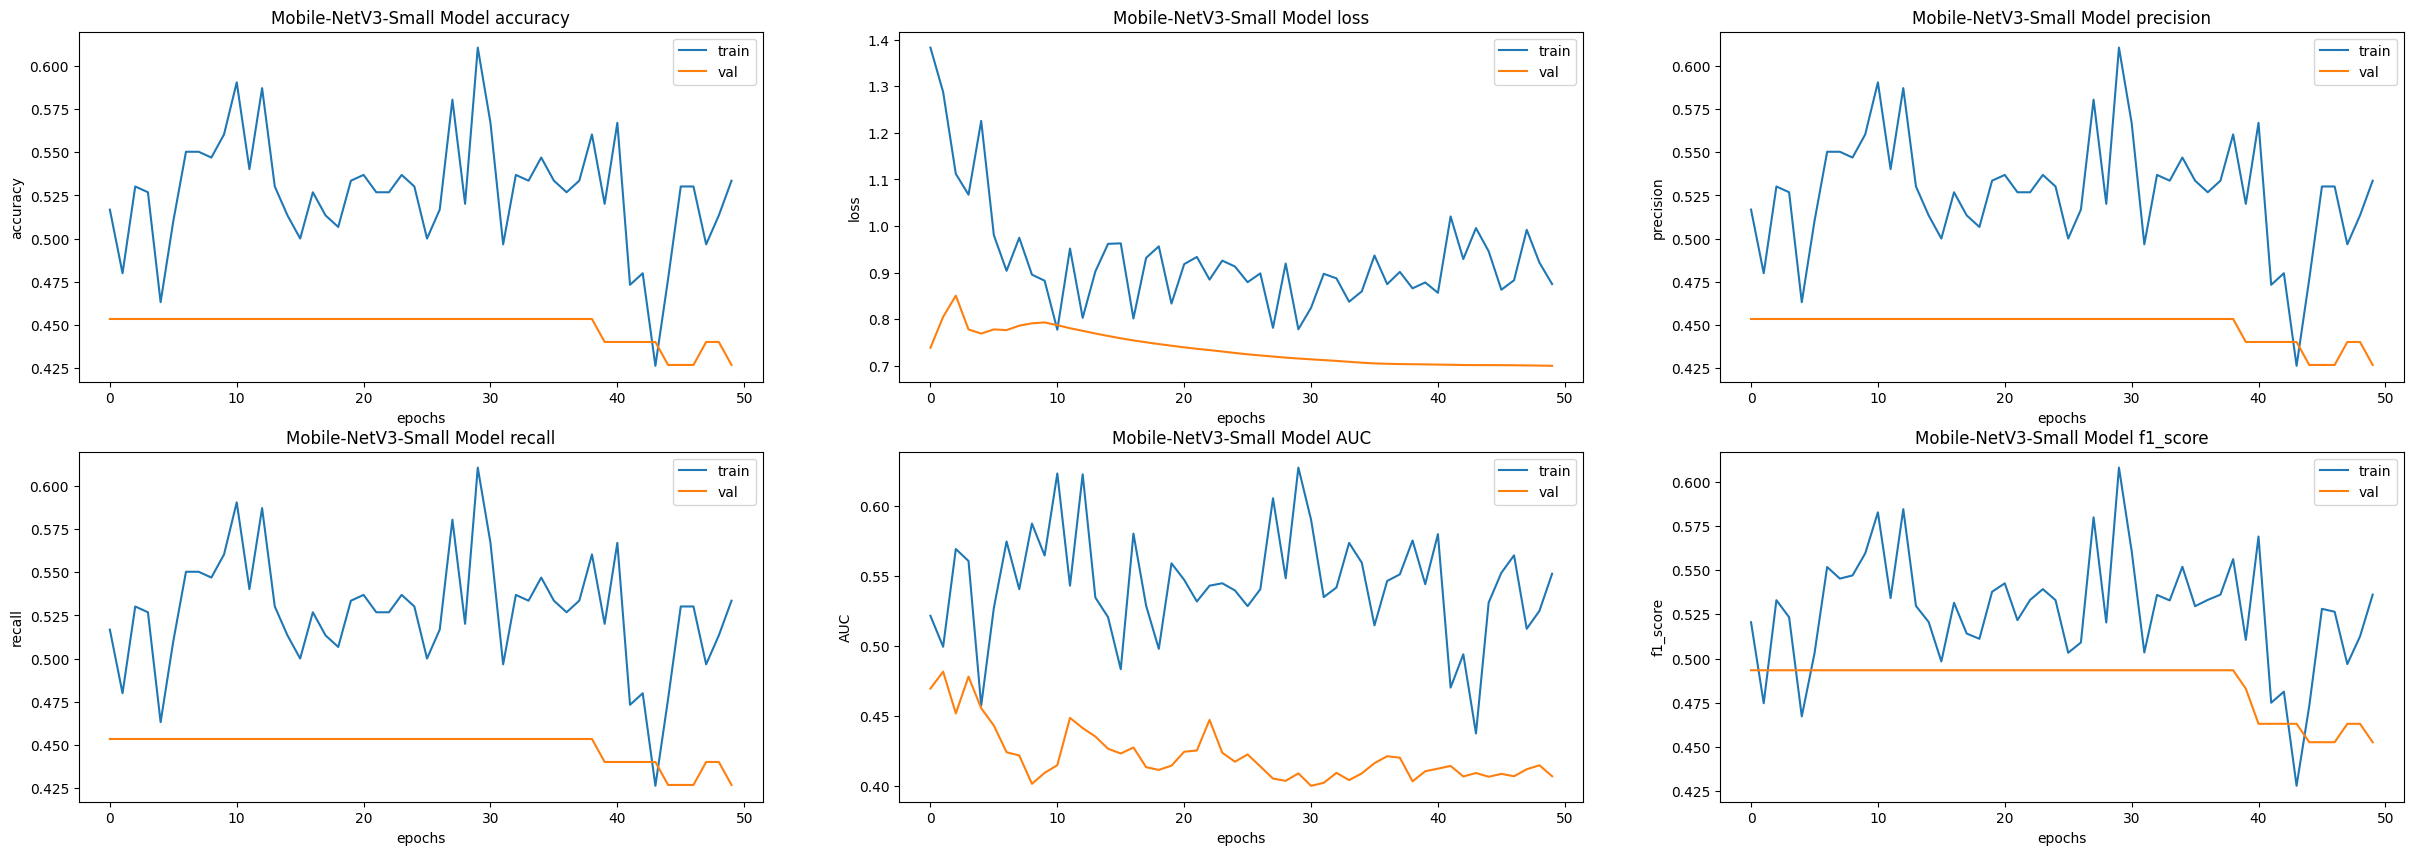

In [48]:
# Interpreting the Metrics
fig, ax = plt.subplots(2, 3, figsize=(30, 10))
ax = ax.ravel()

#for i, met in enumerate(['precision', 'recall', 'accuracy', 'loss']):
for i, met in enumerate(['accuracy', 'loss', 'precision', 'recall', 'AUC', 'f1_score' ]):
    ax[i].plot(History.history[met])
    ax[i].plot(History.history['val_' + met])
    ax[i].set_title('Mobile-NetV3-Small Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])
plt.savefig("Model-plot2.png")

In [49]:
truey=[]
predy=[]
x = x_test
y = y_test

yhat= model.predict(x)
yh = yhat.tolist()
yt = y.tolist()
count = 0

for i in range(len(y)):
    yy = max(yh[i])
    yyt = max(yt[i])
    predy.append(yh[i].index(yy))
    truey.append(yt[i].index(yyt))
    if(yh[i].index(yy)== yt[i].index(yyt)):
        count+=1

acc = (count/len(y))*100

#saving values for confusion matrix and analysis
np.save('truey', truey)
np.save('predy', predy)
print("Predicted and true label values saved")
print("Accuracy on test set :"+str(acc)+"%")

3/3 [==============================] - 1s 8ms/step
Predicted and true label values saved
Accuracy on test set :42.66666666666667%


[[ 0  2]
 [41 32]]


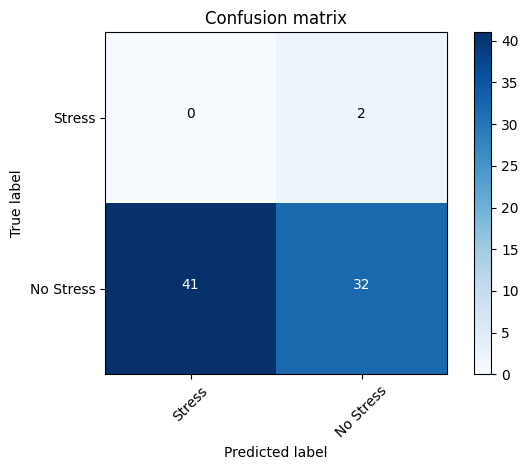

In [50]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


confusion_matrix_img(truey, predy, savename='Confusion Matrix2')

In [52]:
pip install streamlit pillow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 28.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 38.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 10.6 MB/s eta 0:00:00


In [54]:
!pip install streamlit-survey

In [55]:
import streamlit_survey as ss
import streamlit as st

from PIL import Image
import numpy as np

st.write("Stress Test")
st.write("""For each question choose from the following alternatives:\n
          0 - never 1 - almost never 2 - sometimes 3 - fairly often 4 - very often""")


# Align camera input to the left
col1, col2 = st.columns([4, 2])
with col2:
    img_file_buffer = st.camera_input("Take a picture")
    predict_button = st.button("Predict", type="primary", help="Click to predict")

if img_file_buffer is not None:
    # To read image file buffer as a PIL Image:
    img = Image.open(img_file_buffer)

    # To convert PIL Image to numpy array:
    img_array = np.array(img)

    # Check the type of img_array:
    # Should output: <class 'numpy.ndarray'>
    #st.write(type(img_array))

    # Check the shape of img_array:
    # Should output shape: (height, width, channels)
    st.write(img_array.shape)
# Create a submit button that triggers the score calculation


survey = ss.StreamlitSurvey()
responses = []
with col1:
    q1=survey.radio("In the last month, how often have you been upset because of something that happened unexpectedly?", options=[0, 1, 2, 3, 4], horizontal=True)
    responses.append(q1)
    q2=survey.radio("In the last month, how often have you felt that you were unable to control the important things in your life? ", options=[0, 1, 2, 3, 4], horizontal=True)
    responses.append(q2)
    q3=survey.radio("In the last month, how often have you felt nervous and stressed?",  options=[0, 1, 2, 3, 4], horizontal=True)
    responses.append(q3)
    q4 = survey.radio("In the last month, how often have you felt confident about your ability to handle your personal problems?", options=[0, 1, 2, 3, 4], horizontal=True)
    if q4 == 0:
        responses.append(4)
    elif q4 == 1:
        responses.append(3)
    elif q4 == 3:
        responses.append(1)
    elif q4 == 4:
        responses.append(0)
    elif q4 == 2:
        responses.append(2)

    q5=survey.radio("In the last month, how often have you felt that things were going your way?",  options=[0, 1, 2, 3, 4], horizontal=True)
    if q5 == 0:
        responses.append(4)
    elif q5 == 1:
        responses.append(3)
    elif q5 == 3:
        responses.append(1)
    elif q5 == 4:
        responses.append(0)
    elif q5 == 2:
        responses.append(2)
    q6=survey.radio("In the last month, how often have you found that you could not cope with all the things that you had to do?",  options=[0, 1, 2, 3, 4], horizontal=True)
    responses.append(q6)
    q7=survey.radio("In the last month, how often have you been able to control irritations in our  life?",  options=[0, 1, 2, 3, 4], horizontal=True)
    if q7 == 0:
        responses.append(4)
    elif q7 == 1:
        responses.append(3)
    elif q7 == 3:
        responses.append(1)
    elif q7 == 4:
        responses.append(0)
    elif q7 == 2:
        responses.append(2)
    q8=survey.radio("In the last month, how often have you felt that you were on top of things?", options=[0, 1, 2, 3, 4], horizontal=True)
    if q8 == 0:
        responses.append(4)
    elif q8 == 1:
        responses.append(3)
    elif q8 == 3:
        responses.append(1)
    elif q8 == 4:
        responses.append(0)
    elif q8 == 2:
        responses.append(2)
    q9=survey.radio("In the last month, how often have you been angered because of things that happened that were outside of your control?",  options=[0, 1, 2, 3, 4], horizontal=True)
    responses.append(q9)
    q10=survey.radio(" In the last month, how often have you felt difficulties were piling up so high that you could not overcome them?",  options=[0, 1, 2, 3, 4], horizontal=True)
    responses.append(q10)
    # Define a function to calculate the score based on the responses
    def calculate_score(responses):
        score = sum(int(response) for response in responses)
        return score

    # Create a submit button that triggers the score calculation
    submit_button = st.button("Submit", type="primary", help="Click to calculate the score")

# If submit button is clicked, calculate the score and display it
if submit_button:
    total_score = calculate_score(responses)
    st.success(f"Your total stress score is: {total_score}")

     # Classify stress level
    if total_score <= 13:
        st.write("Your stress level is low.")
    elif total_score <= 26:
        st.write("Your stress level is moderate.")
    else:
        st.write("Your stress level is high.")

2024-07-01 19:42:03.163 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2024-07-01 19:42:03.168 Session state does not function when running a script without `streamlit run`


In [56]:
!pip install streamlit pillow pyngrok

In [57]:
with open('/content/sample_data/app.py', 'w') as f:
    f.write('''
import streamlit_survey as ss
import streamlit as st

from PIL import Image
import numpy as np

st.write("Stress Test")
st.write("""For each question choose from the following alternatives:\n
          0 - never 1 - almost never 2 - sometimes 3 - fairly often 4 - very often""")

# Align camera input to the left
col1, col2 = st.columns([4, 2])
with col2:
    img_file_buffer = st.camera_input("Take a picture")
    predict_button = st.button("Predict", type="primary", help="Click to predict")

if img_file_buffer is not None:
    # To read image file buffer as a PIL Image:
    img = Image.open(img_file_buffer)

    # To convert PIL Image to numpy array:
    img_array = np.array(img)

    # Check the type of img_array:
    # Should output: <class 'numpy.ndarray'>
    #st.write(type(img_array))

    # Check the shape of img_array:
    # Should output shape: (height, width, channels)
    st.write(img_array.shape)

# Create a submit button that triggers the score calculation
survey = ss.StreamlitSurvey()
responses = []
with col1:
    q1 = survey.radio("In the last month, how often have you been upset because of something that happened unexpectedly?", options=[0, 1, 2, 3, 4], horizontal=True)
    responses.append(q1)
    q2 = survey.radio("In the last month, how often have you felt that you were unable to control the important things in your life? ", options=[0, 1, 2, 3, 4], horizontal=True)
    responses.append(q2)
    q3 = survey.radio("In the last month, how often have you felt nervous and stressed?", options=[0, 1, 2, 3, 4], horizontal=True)
    responses.append(q3)
    q4 = survey.radio("In the last month, how often have you felt confident about your ability to handle your personal problems?", options=[0, 1, 2, 3, 4], horizontal=True)
    if q4 == 0:
        responses.append(4)
    elif q4 == 1:
        responses.append(3)
    elif q4 == 3:
        responses.append(1)
    elif q4 == 4:
        responses.append(0)
    elif q4 == 2:
        responses.append(2)

    q5 = survey.radio("In the last month, how often have you felt that things were going your way?", options=[0, 1, 2, 3, 4], horizontal=True)
    if q5 == 0:
        responses.append(4)
    elif q5 == 1:
        responses.append(3)
    elif q5 == 3:
        responses.append(1)
    elif q5 == 4:
        responses.append(0)
    elif q5 == 2:
        responses.append(2)
    q6 = survey.radio("In the last month, how often have you found that you could not cope with all the things that you had to do?", options=[0, 1, 2, 3, 4], horizontal=True)
    responses.append(q6)
    q7 = survey.radio("In the last month, how often have you been able to control irritations in your life?", options=[0, 1, 2, 3, 4], horizontal=True)
    if q7 == 0:
        responses.append(4)
    elif q7 == 1:
        responses.append(3)
    elif q7 == 3:
        responses.append(1)
    elif q7 == 4:
        responses.append(0)
    elif q7 == 2:
        responses.append(2)
    q8 = survey.radio("In the last month, how often have you felt that you were on top of things?", options=[0, 1, 2, 3, 4], horizontal=True)
    if q8 == 0:
        responses.append(4)
    elif q8 == 1:
        responses.append(3)
    elif q8 == 3:
        responses.append(1)
    elif q8 == 4:
        responses.append(0)
    elif q8 == 2:
        responses.append(2)
    q9 = survey.radio("In the last month, how often have you been angered because of things that happened that were outside of your control?", options=[0, 1, 2, 3, 4], horizontal=True)
    responses.append(q9)
    q10 = survey.radio("In the last month, how often have you felt difficulties were piling up so high that you could not overcome them?", options=[0, 1, 2, 3, 4], horizontal=True)
    responses.append(q10)

# Define a function to calculate the score based on the responses
def calculate_score(responses):
    score = sum(int(response) for response in responses)
    return score

# Create a submit button that triggers the score calculation
submit_button = st.button("Submit", type="primary", help="Click to calculate the score")

# If submit button is clicked, calculate the score and display it
if submit_button:
    total_score = calculate_score(responses)
    st.success(f"Your total stress score is: {total_score}")

    # Classify stress level
    if total_score <= 13:
        st.write("Your stress level is low.")
    elif total_score <= 26:
        st.write("Your stress level is moderate.")
    else:
        st.write("Your stress level is high.")
    ''')


In [61]:
# Install the necessary packages
!pip install streamlit pillow pyngrok

# Write the Streamlit app to a file
with open('/content/sample_data/app.py', 'w') as f:
    f.write('''
import streamlit_survey as ss
import streamlit as st

from PIL import Image
import numpy as np

st.write("Stress Test")
st.write("""For each question choose from the following alternatives:\n
          0 - never 1 - almost never 2 - sometimes 3 - fairly often 4 - very often""")

# Align camera input to the left
col1, col2 = st.columns([4, 2])
with col2:
    img_file_buffer = st.camera_input("Take a picture")
    predict_button = st.button("Predict", type="primary", help="Click to predict")

if img_file_buffer is not None:
    # To read image file buffer as a PIL Image:
    img = Image.open(img_file_buffer)

    # To convert PIL Image to numpy array:
    img_array = np.array(img)

    # Check the type of img_array:
    # Should output: <class 'numpy.ndarray'>
    #st.write(type(img_array))

    # Check the shape of img_array:
    # Should output shape: (height, width, channels)
    st.write(img_array.shape)

# Create a submit button that triggers the score calculation
survey = ss.StreamlitSurvey()
responses = []
with col1:
    q1 = survey.radio("In the last month, how often have you been upset because of something that happened unexpectedly?", options=[0, 1, 2, 3, 4], horizontal=True)
    responses.append(q1)
    q2 = survey.radio("In the last month, how often have you felt that you were unable to control the important things in your life? ", options=[0, 1, 2, 3, 4], horizontal=True)
    responses.append(q2)
    q3 = survey.radio("In the last month, how often have you felt nervous and stressed?", options=[0, 1, 2, 3, 4], horizontal=True)
    responses.append(q3)
    q4 = survey.radio("In the last month, how often have you felt confident about your ability to handle your personal problems?", options=[0, 1, 2, 3, 4], horizontal=True)
    if q4 == 0:
        responses.append(4)
    elif q4 == 1:
        responses.append(3)
    elif q4 == 3:
        responses.append(1)
    elif q4 == 4:
        responses.append(0)
    elif q4 == 2:
        responses.append(2)

    q5 = survey.radio("In the last month, how often have you felt that things were going your way?", options=[0, 1, 2, 3, 4], horizontal=True)
    if q5 == 0:
        responses.append(4)
    elif q5 == 1:
        responses.append(3)
    elif q5 == 3:
        responses.append(1)
    elif q5 == 4:
        responses.append(0)
    elif q5 == 2:
        responses.append(2)
    q6 = survey.radio("In the last month, how often have you found that you could not cope with all the things that you had to do?", options=[0, 1, 2, 3, 4], horizontal=True)
    responses.append(q6)
    q7 = survey.radio("In the last month, how often have you been able to control irritations in your life?", options=[0, 1, 2, 3, 4], horizontal=True)
    if q7 == 0:
        responses.append(4)
    elif q7 == 1:
        responses.append(3)
    elif q7 == 3:
        responses.append(1)
    elif q7 == 4:
        responses.append(0)
    elif q7 == 2:
        responses.append(2)
    q8 = survey.radio("In the last month, how often have you felt that you were on top of things?", options=[0, 1, 2, 3, 4], horizontal=True)
    if q8 == 0:
        responses.append(4)
    elif q8 == 1:
        responses.append(3)
    elif q8 == 3:
        responses.append(1)
    elif q8 == 4:
        responses.append(0)
    elif q8 == 2:
        responses.append(2)
    q9 = survey.radio("In the last month, how often have you been angered because of things that happened that were outside of your control?", options=[0, 1, 2, 3, 4], horizontal=True)
    responses.append(q9)
    q10 = survey.radio("In the last month, how often have you felt difficulties were piling up so high that you could not overcome them?", options=[0, 1, 2, 3, 4], horizontal=True)
    responses.append(q10)

# Define a function to calculate the score based on the responses
def calculate_score(responses):
    score = sum(int(response) for response in responses)
    return score

# Create a submit button that triggers the score calculation
submit_button = st.button("Submit", type="primary", help="Click to calculate the score")

# If submit button is clicked, calculate the score and display it
if submit_button:
    total_score = calculate_score(responses)
    st.success(f"Your total stress score is: {total_score}")

    # Classify stress level
    if total_score <= 13:
        st.write("Your stress level is low.")
    elif total_score <= 26:
        st.write("Your stress level is moderate.")
    else:
        st.write("Your stress level is high.")
''')

import os
from pyngrok import ngrok

# Set your ngrok authtoken (replace "YOUR_NGROK_AUTH_TOKEN" with your actual token)
!ngrok authtoken 2iexuJfdFJkMSZG8ZRGmPifkXoL_7ZynQqikaDWsc8KzagGhF

# Kill any previous instances of streamlit if running
!killall -9 streamlit

# Set up the public URL via ngrok
public_url = ngrok.connect(8501)
print(f'Public URL: {public_url}')

# Run the Streamlit app
os.system('streamlit run /content/sample_data/app.py &')


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml
streamlit: no process found
Public URL: NgrokTunnel: "https://c9b9-104-199-135-4.ngrok-free.app" -> "http://localhost:8501"


0